<a href="https://colab.research.google.com/github/Neethupmathew/Banking-System-Assignment/blob/main/ML_Task4_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Cleaning & Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [4]:
#we using pandas library to load the dataset.
car = pd.read_csv("/content/sample_data/CarPrice_Assignment (1).csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car.drop(['car_ID'],axis=1, inplace=True)
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
print(len(car['CarName'].unique()))
car['CarName'].unique()

147


array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 


As we mentioned above, extarcting company name from CarName.

In [7]:
car['Company'] = car['CarName'].str.split(' ').str[0]
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [8]:
#drop CarName column
del car['CarName']

In [9]:
#Now, we checking the unique value present in the Company column.
print(len(car['Company'].unique()))
car['Company'].unique()

28


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
#Here, we can see that there are some company name got wrongly spelled, we have to correct it.

In [11]:
car.replace(['maxda','nissan','porcshce','toyouta','vokswagen','vw'],['mazda','Nissan','porsche','toyota','volkswagen','volkswagen'],inplace = True)

print(len(car['Company'].unique()))
car['Company'].unique()

22


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

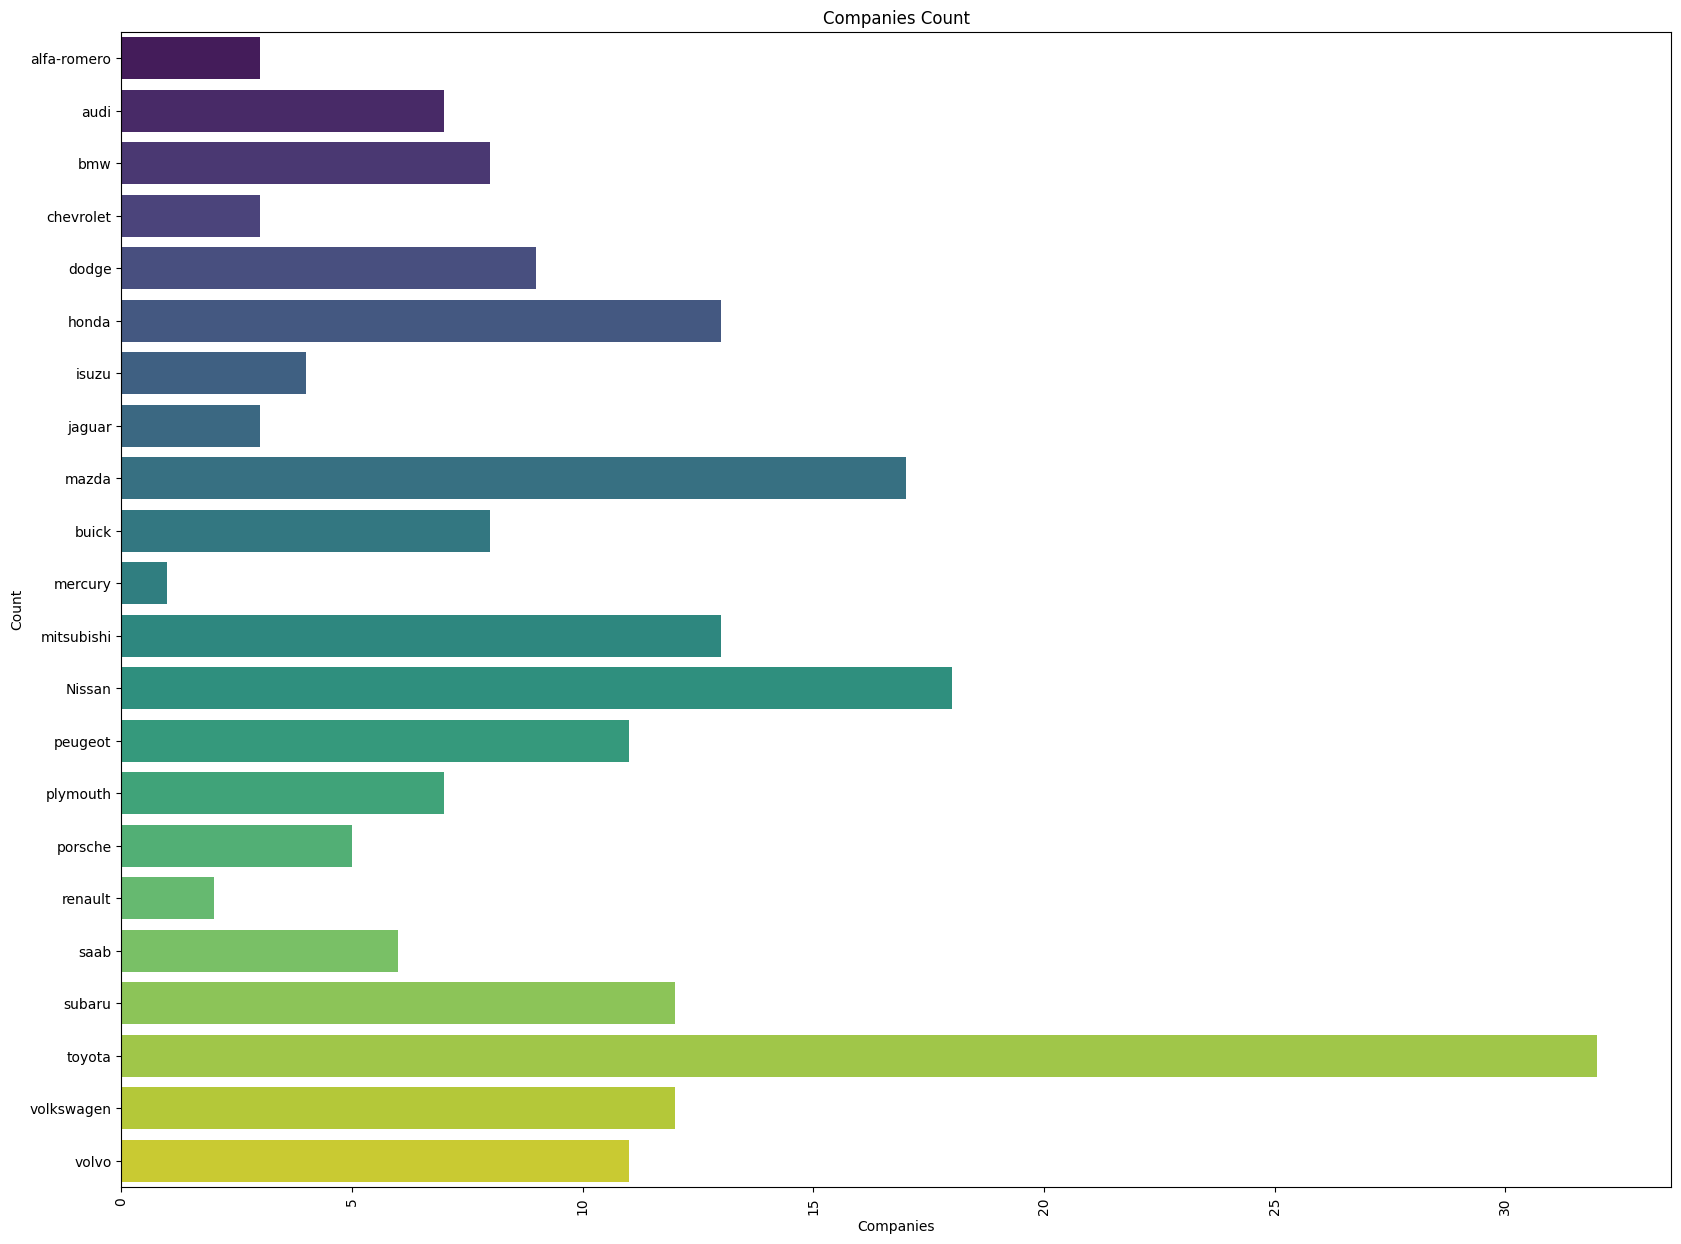

In [12]:
plt.figure(figsize = (20, 15))
sns.countplot(car['Company'], palette = 'viridis')
plt.title('Companies Count')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

As we can see, toyota company cars are more and mercury company cars are less.

In [16]:
#print the categorical and numerical separetly
car_cat = car.select_dtypes(include='object')
car_num = car.select_dtypes(include='int', 'float')
car_cat.nunique()

,0
fueltype,2
aspiration,2
doornumber,2
carbody,5
drivewheel,3
enginelocation,2
enginetype,7
cylindernumber,7
fuelsystem,8
Company,22


In [19]:
car_num.nunique()

,0
symboling,6
wheelbase,53
carlength,75
carwidth,44
carheight,49
curbweight,171
enginesize,44
boreratio,38
stroke,37
compressionratio,32


Now, we have to check the outliers for numeical columns using boxplot.

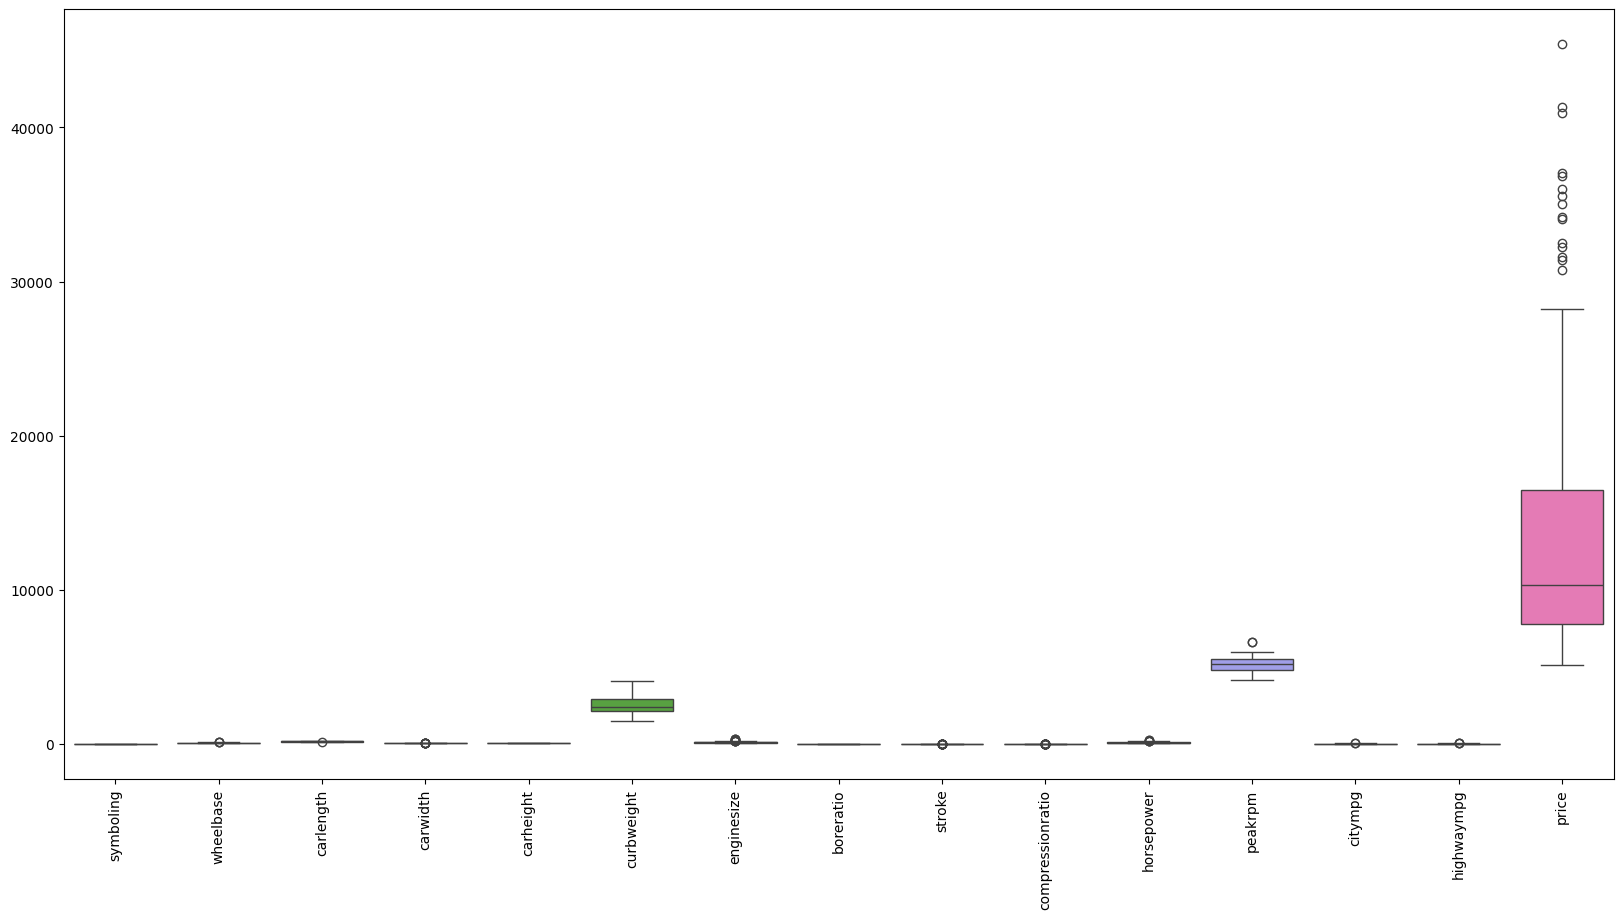

In [20]:
#boxplot for all numrical columns
plt.figure(figsize = (20,10))
sns.boxplot(data = car.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

In [21]:
#from the above boxplot, we can see that the following columns has outliers and we have to do the outlier treatment for them.
#1. wheelbase
#2. carlength
#3. carwidth
#4. enginesize
#5. stroke
#6. compressionratio
#7. horsepower
#8. peakrpm
#9. citympg
#10. highwaympg
#11. price

In [ ]:
#remove outliers
#for removing outliers, we can use several methods,
#1. Mean Function
#2. Percentile method
#3. IQR(Inter quartile range method)
#4. Normal distribution
#5. Zscore method

#Here we using the IQR method which seems to be effective and our dataset have small no of values.

In [22]:
#define a function called outliers which returns a list of index of outliers
#IQR =Q3- Q1
#+/- 1.5*IQR

def outliers(car, ft):
    Q1 = car[ft].quantile(0.25)
    Q3 = car[ft].quantile(0.75)
    IQR = Q3 -Q1
#creating the lower bound and upper bound
    Lower_bound = Q1 - 1.5* IQR
    Upper_bound = Q3 + 1.5* IQR
#creating ls variable to store the index of ouliers of each variable.
    ls = car.index[ (car[ft]<Lower_bound)  | (car[ft] > Upper_bound) ]
    return ls

In [23]:
outliers(car, "wheelbase")

Index([70, 71, 73], dtype='int64')

In [24]:
outliers(car,"carlength")

Index([18], dtype='int64')

In [25]:
outliers(car,"carwidth")

Index([6, 7, 8, 70, 71, 73, 74, 129], dtype='int64')

In [26]:
outliers(car,"enginesize")

Index([15, 16, 17, 47, 48, 49, 71, 72, 73, 74], dtype='int64')

In [28]:
outliers(car,"stroke")

Index([ 29,  47,  48, 111, 113, 130, 131, 134, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149],
      dtype='int64')

In [29]:
outliers(car,"compressionratio")

Index([  9,  29,  49,  63,  66,  67,  68,  69,  70,  82,  83,  84,  90, 108,
       110, 112, 114, 116, 117, 124, 158, 159, 174, 182, 184, 187, 192, 203],
      dtype='int64')

In [30]:
outliers(car,"horsepower")

Index([49, 105, 126, 127, 128, 129], dtype='int64')

In [31]:
outliers(car,"peakrpm")

Index([165, 166], dtype='int64')

In [32]:
outliers(car,"citympg")

Index([18, 30], dtype='int64')

In [33]:
outliers(car,"highwaympg")

Index([18, 30, 90], dtype='int64')

In [34]:
outliers(car,"price")

Index([15, 16, 17, 47, 48, 49, 70, 71, 72, 73, 74, 126, 127, 128, 129], dtype='int64')

In [37]:
# create an empty list to store the output indices from multiple columns
index_list = []
for feature in ["wheelbase", "carlength", "carwidth", "enginesize", "horsepower","compressionratio", "stroke" ,"peakrpm", "citympg", "highwaympg", "price"]:
    index_list.extend(outliers(car, feature))

In [38]:
index_list

[70,
 71,
 73,
 18,
 6,
 7,
 8,
 70,
 71,
 73,
 74,
 129,
 15,
 16,
 17,
 47,
 48,
 49,
 71,
 72,
 73,
 74,
 49,
 105,
 126,
 127,
 128,
 129,
 9,
 29,
 49,
 63,
 66,
 67,
 68,
 69,
 70,
 82,
 83,
 84,
 90,
 108,
 110,
 112,
 114,
 116,
 117,
 124,
 158,
 159,
 174,
 182,
 184,
 187,
 192,
 203,
 29,
 47,
 48,
 111,
 113,
 130,
 131,
 134,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 165,
 166,
 18,
 30,
 18,
 30,
 90,
 15,
 16,
 17,
 47,
 48,
 49,
 70,
 71,
 72,
 73,
 74,
 126,
 127,
 128,
 129]

In [39]:
#Here, we list the index of outliers present in the columns.
#Now, we can remove the outliers and we can capping them.
#Here, we will cap the outliers by the lower and upper bounds.
#because, The dataset have lower no.of values.

In [40]:
#we have to define a function to cap the outliers using the lower bound and upperbound.
def cap_outliers_iqr(car):
    df_cap = car.copy()

    for feature in["wheelbase", "carlength", "carwidth", "enginesize", "horsepower","compressionratio", "stroke" ,"peakrpm", "citympg", "highwaympg", "price"]:
        Q1 = car[feature].quantile(0.25)
        Q3 = car[feature].quantile(0.75)
        IQR = Q3-Q1


        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        #cap the outliers using loc method
        df_cap.loc[df_cap[feature] < lower_bound, feature] = lower_bound
        df_cap.loc[df_cap[feature] > upper_bound, feature] = upper_bound

    return df_cap

In [41]:
df_cap = cap_outliers_iqr(car)
df_cap.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0,audi


In [42]:
df_cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

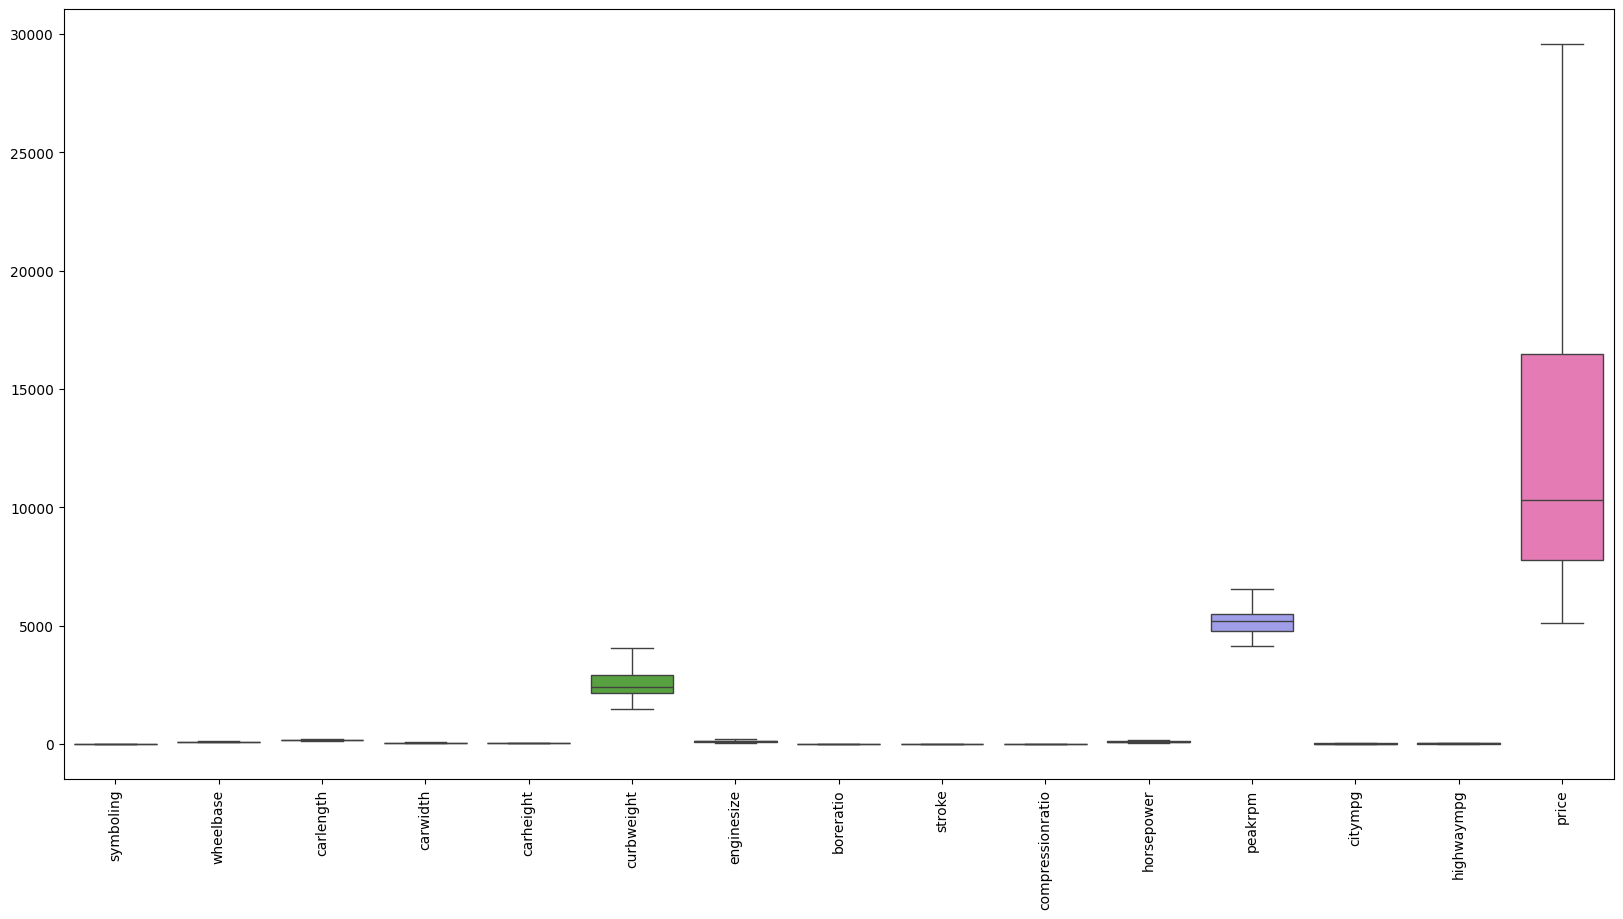

In [43]:
#boxplot for all numrical columns
plt.figure(figsize = (20,10))
sns.boxplot(data = df_cap.select_dtypes(include = 'number'))
plt.xticks(rotation = 90)
plt.show()

In [44]:
#Now, we can see all the otliers are treated.

LabelEncoding

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
df_cap.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0,audi


In [47]:
#Label_Encoding
Label_Encoder = preprocessing.LabelEncoder()
#Encode the categorical columns
for i in df_cap.select_dtypes(include = 'object'):
    df_cap[i] = Label_Encoder.fit_transform(df_cap[i])


In [48]:
df_cap.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0,1
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,5,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0,1
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,5,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0,1
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,5,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0,2
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,5,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0,2


Feature Selection

In [57]:
#to know the correlation matrix
corr = df_cap.corr()

In [60]:
# Set the correlation threshold
threshold = 0.85

# Find pairs of features with high correlation
high_corr_pairs = np.where(np.abs(corr) > threshold)

# Filter out the redundant and self correlations
high_corr_pairs = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

# Print the high correlation pairs and their values
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {corr.loc[pair[0], pair[1]]}")

wheelbase and carlength: 0.8747803507908471
carlength and curbweight: 0.8777284608306433
carwidth and curbweight: 0.871963228629925
curbweight and enginesize: 0.8664452072780174
curbweight and price: 0.8645971716198658
enginesize and price: 0.8600626901753535
citympg and highwaympg: 0.9665236031749337


<Axes: >

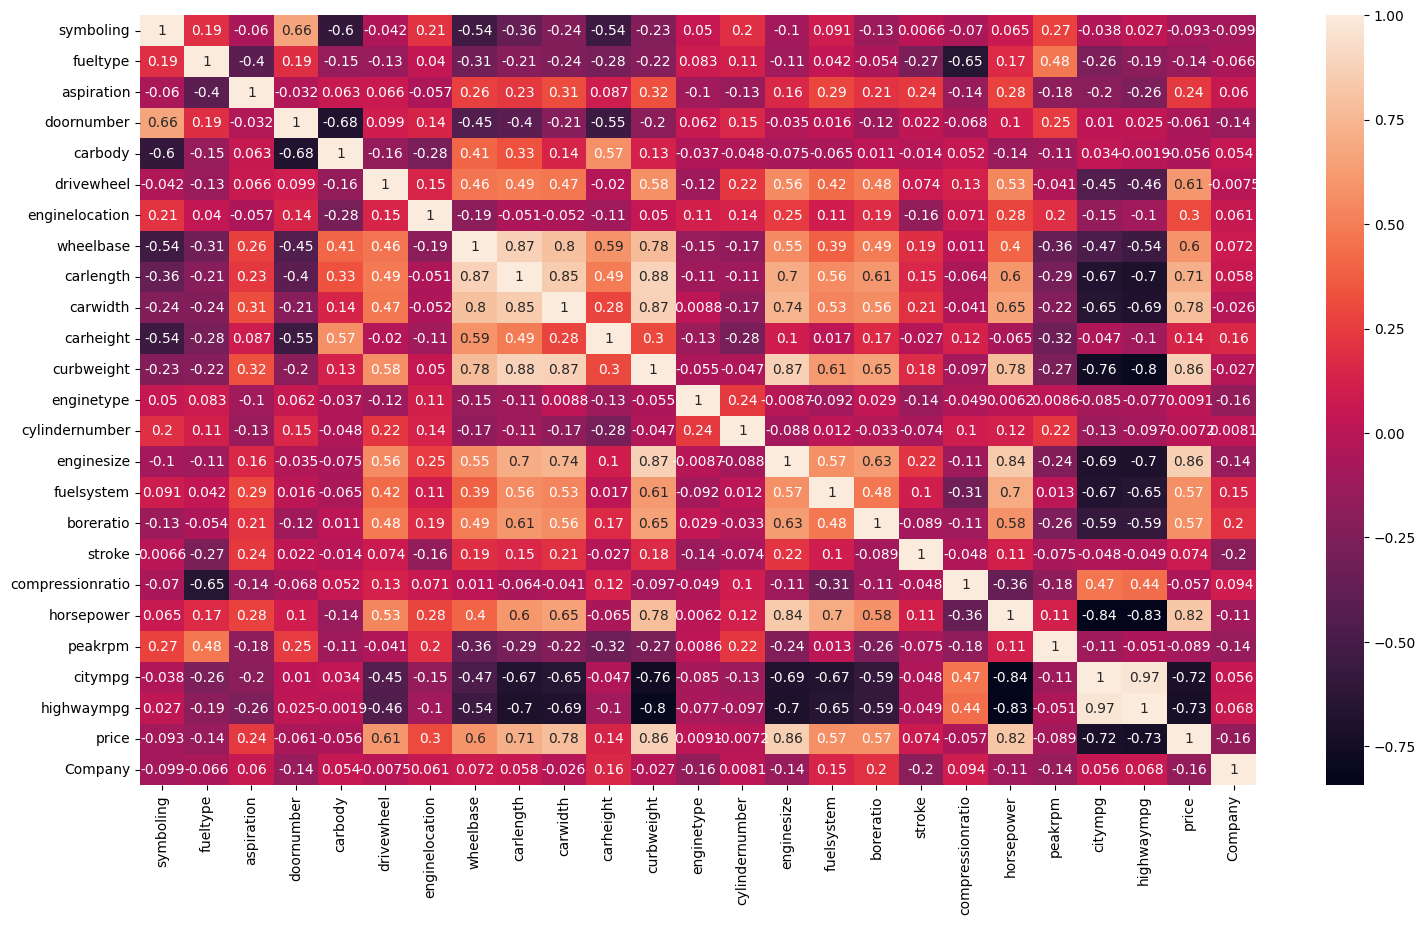

In [50]:
#Correlation Matrix: Identify highly correlated features
corr_matrix = df_cap.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True)

From the above Heatmap, it is visible that some independent variables are intercorrelated.
1. Citympg and Highwaympg
2. Carlength and wheelbase
3. Curbweight and carlength
4. Curbweight and carwidth
5. enginesize and curbweight

     this is what we called multicollineraity. Thus the independent variable are intercorrelated, this effect in price we cann't predict as well. So, we need to remove these features.

 Checking the correlation value between price other factors, we can see that, citympg and highway has negative correlation, means for high milage vehicle has low price and vice versa.

 The factors affecting price as per the Heatmap are,

  1. curbweight (0.86)
  2. enginesize (0.86)
  3. horsepower (0.82)
  4. carwidth (0.78)
  5. carlength (0.71)
  6. drivewheel (0.61)
  7. wheelbase (0.60)
  7. fuelsystem (0.57)
  8. boreratio (0.57)
  9. aspiration (0.24)

And highnegative correlation with
  1. citympg (-0.72)
  2. highwaympg (-0.73)
  



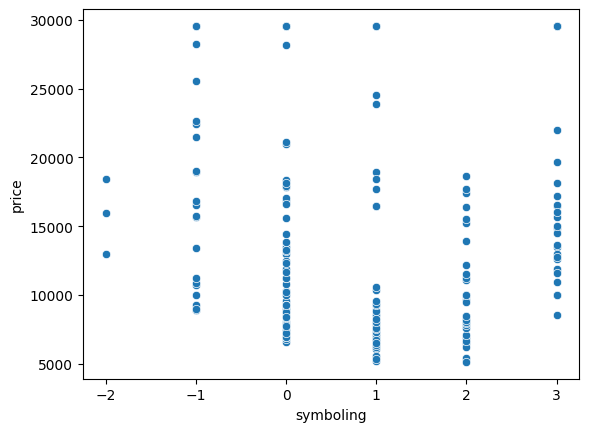

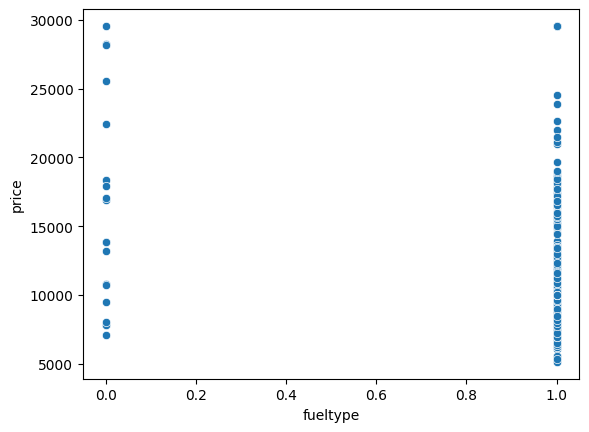

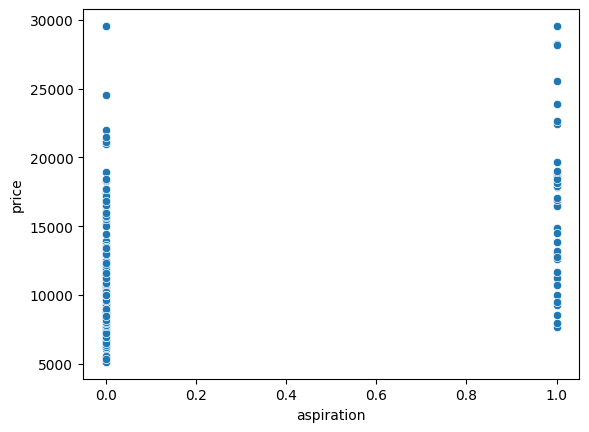

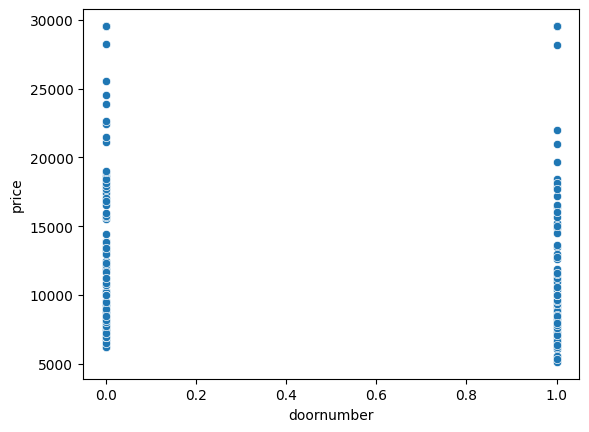

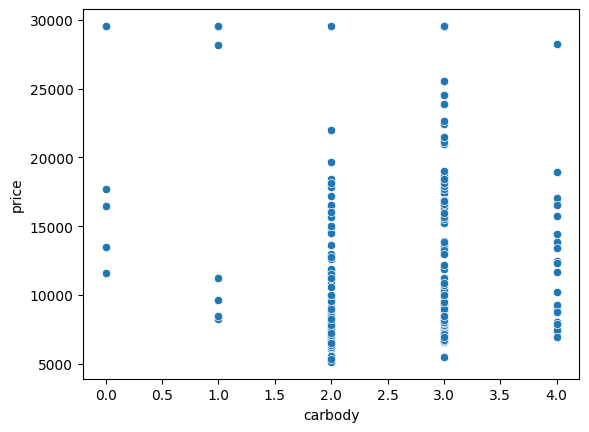

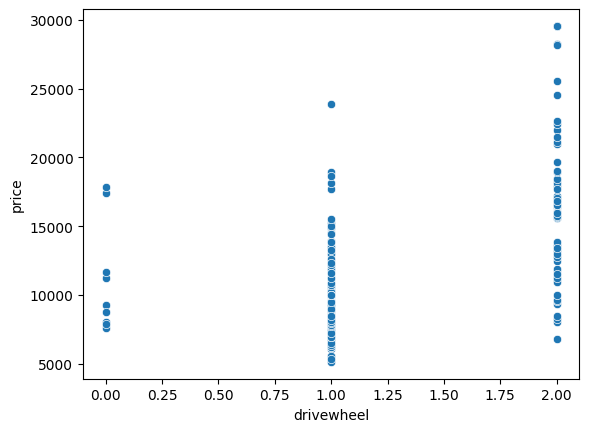

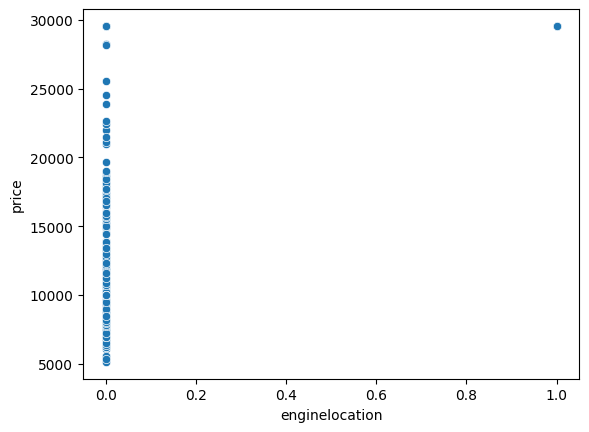

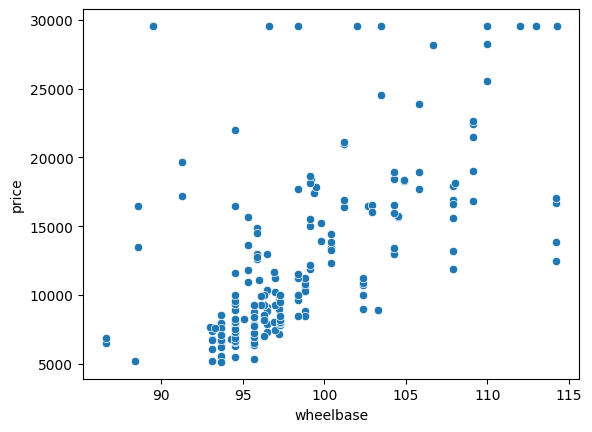

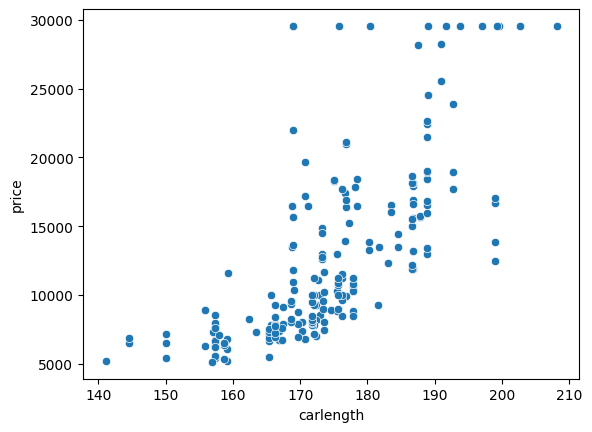

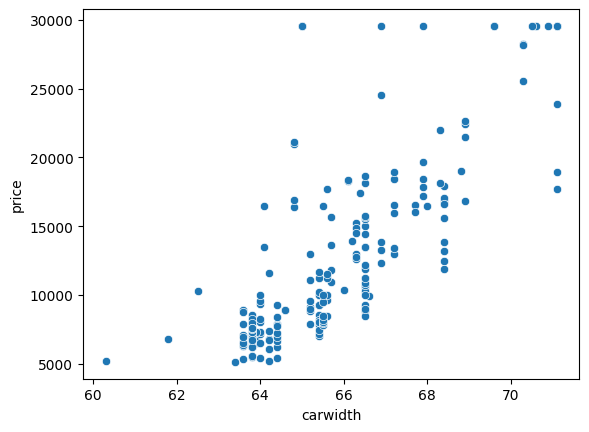

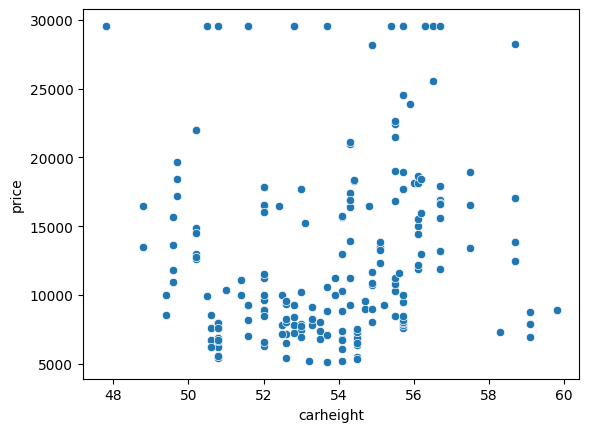

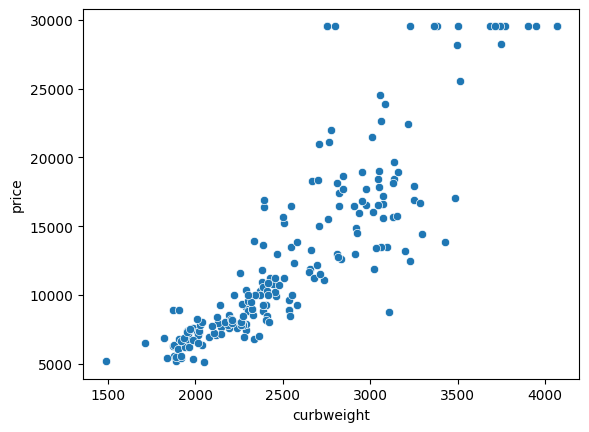

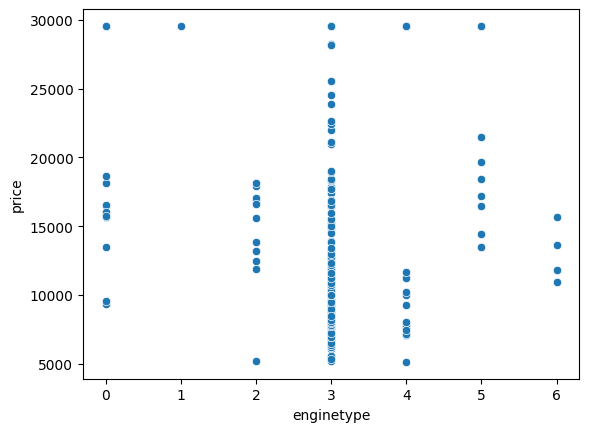

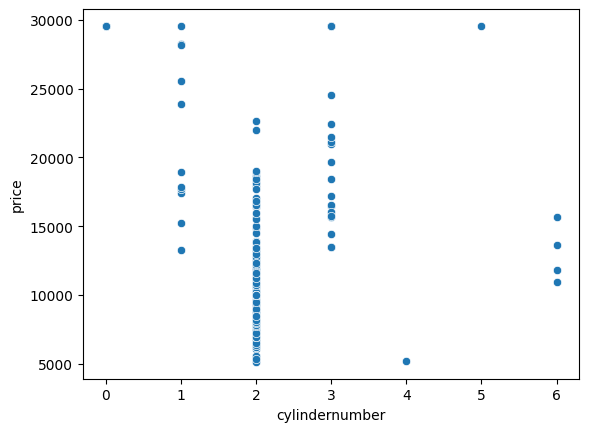

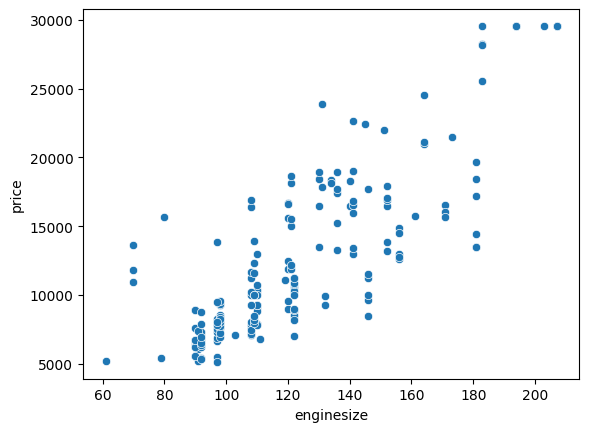

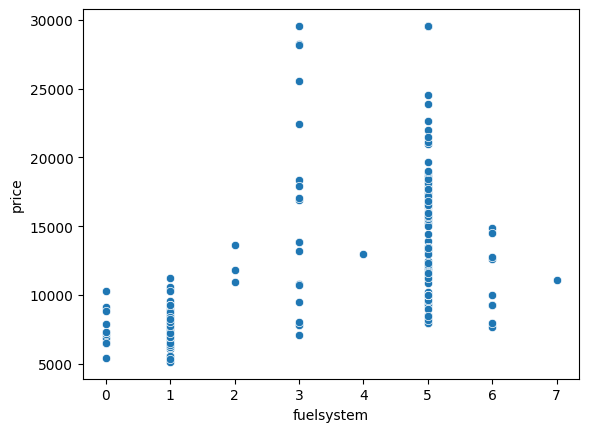

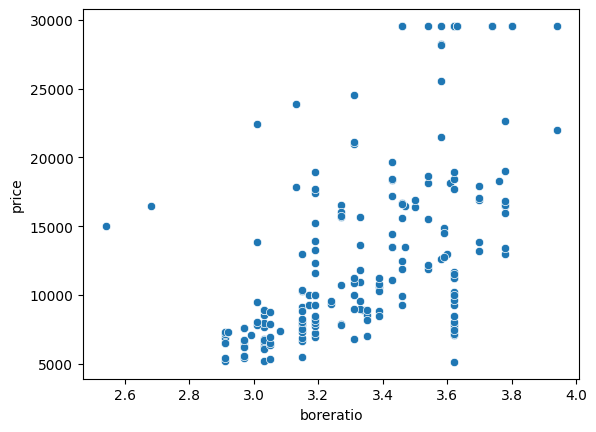

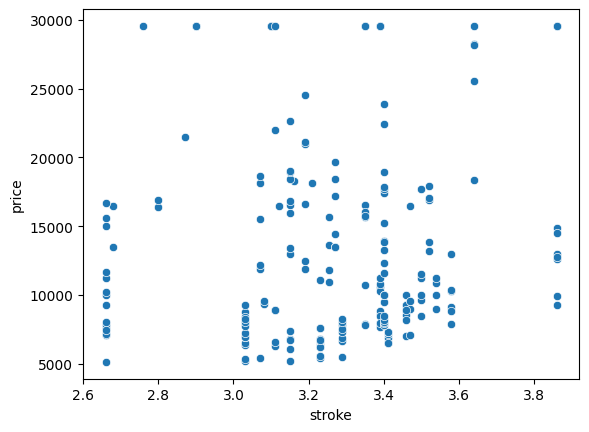

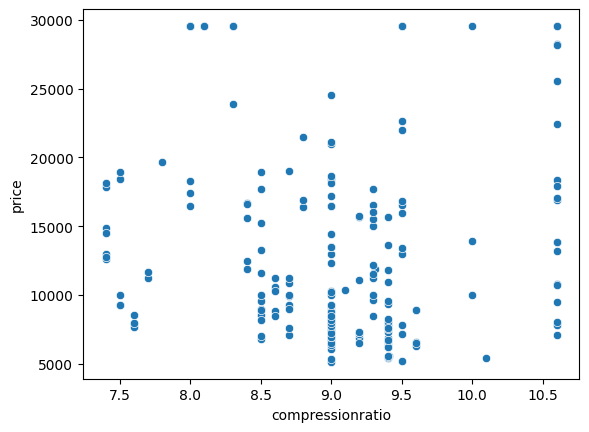

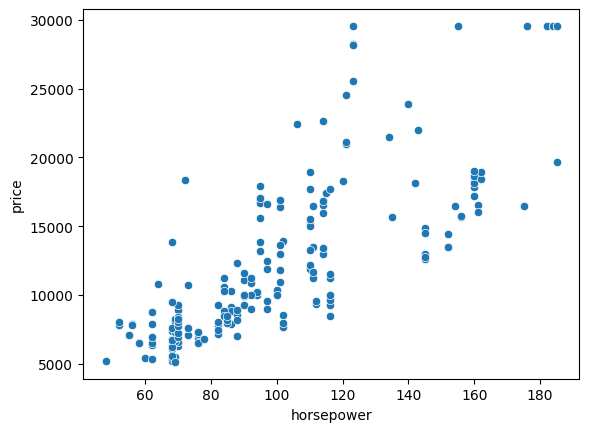

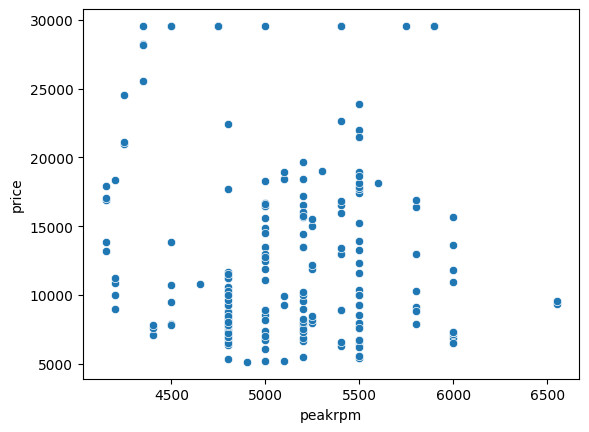

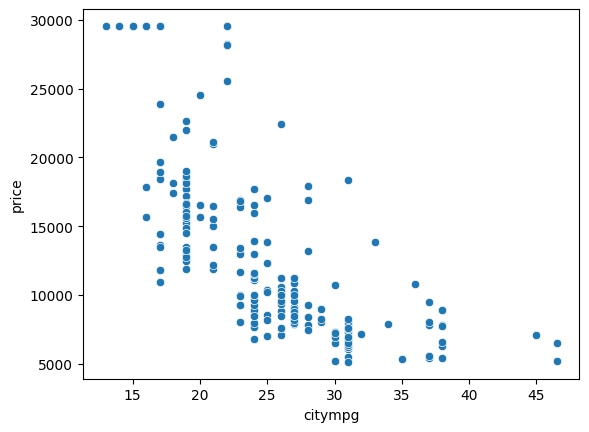

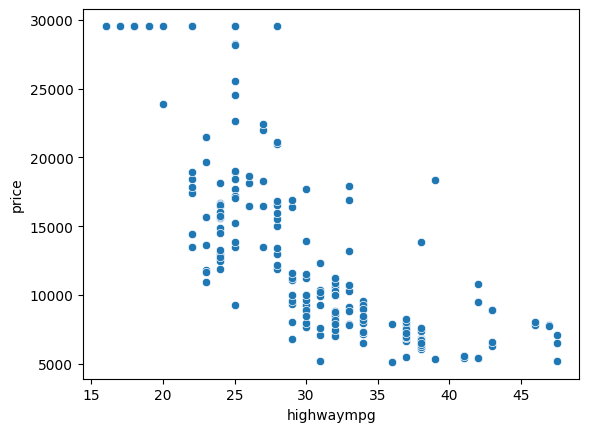

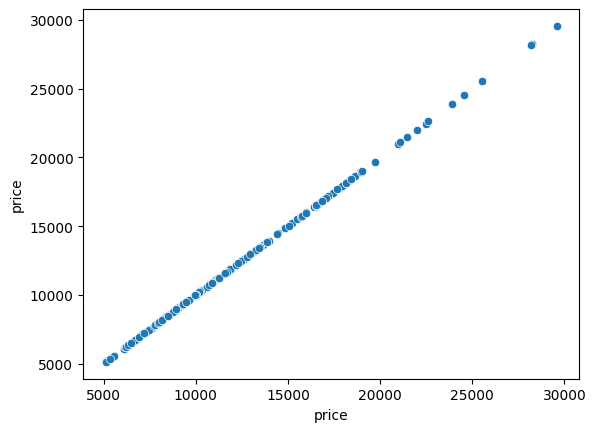

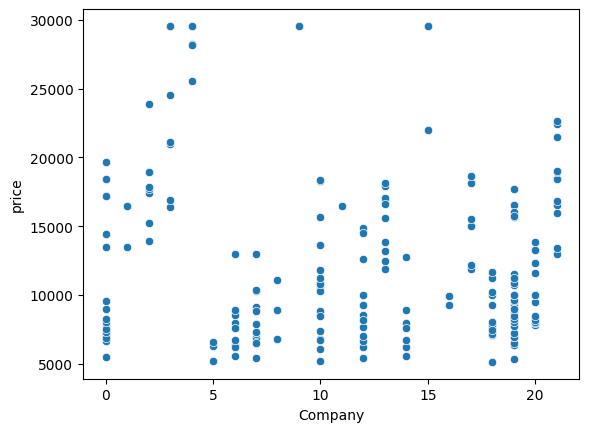

In [54]:
#LINEARITY CHECK>>>#to check price has linear relation or not with Indep. var's

for i, col in enumerate (df_cap.columns):
    plt.figure(i)
    sns.scatterplot(x=df_cap[col],y=df_cap['price'])

From the scatterplot, it is visible that, features that are linearly dependent with the following features;
  1. wheelbase
  2. carlength
  3. carwdith
  4. curbweight
  5. enginesize
  6. boreratio
  7. horsepower
  8. citympg
  9. highwaympg

Analysing the Heatmap and sactterplot, we need to remove features which are higly intercorrelated.
They are,
1. Carlength
2. carwidth
3. wheelbase
4. curbweight
5. citympg
6. highwaympg
7. enginesize

In [61]:
df_cap.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Company'],
      dtype='object')

After checking the intercorrelation and Heatmap, we have the following
features that are not intercorelated and affecting the price of the car are, (although, only boreratio and horsepower are linearly dependent)
1. symboling
2. fueltype
3. aspiration
4. doornumber
3. carbody
4. drivewheel
5. enginelocation
6. fuelsystem
7. carheight
8. enginetype
9. cylindernumber
10. fuelsystem
11. boreratio
12. stroke
13. compressionratio
14. horsepower
15. peakrpm
16. company



In [64]:
#now splitting the data for training and testing
X = df_cap.drop(columns = ['price', 'carlength', 'carwidth', 'wheelbase', 'curbweight', 'enginesize', 'citympg', 'highwaympg'])
y = df_cap['price']

In [66]:
X.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,Company
0,3,1,0,1,0,2,0,48.8,0,2,5,3.47,2.68,9.0,111,5000,1
1,3,1,0,1,0,2,0,48.8,0,2,5,3.47,2.68,9.0,111,5000,1
2,1,1,0,1,2,2,0,52.4,5,3,5,2.68,3.47,9.0,154,5000,1
3,2,1,0,0,3,1,0,54.3,3,2,5,3.19,3.40,10.0,102,5500,2
4,2,1,0,0,3,0,0,54.3,3,1,5,3.19,3.40,8.0,115,5500,2
5,2,1,0,1,3,1,0,53.1,3,1,5,3.19,3.40,8.5,110,5500,2
6,1,1,0,0,3,1,0,55.7,3,1,5,3.19,3.40,8.5,110,5500,2
7,1,1,0,0,4,1,0,55.7,3,1,5,3.19,3.40,8.5,110,5500,2
8,1,1,1,0,3,1,0,55.9,3,1,5,3.13,3.40,8.3,140,5500,2
9,0,1,1,1,2,0,0,52.0,3,1,5,3.13,3.40,7.4,160,5500,2


Data Splitting

In [67]:
#data splitting for training and testing.
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [68]:
#import minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [69]:
X_train_new.shape

(164, 17)

In [70]:
X_train_new

array([[0.4       , 0.        , 0.        , ..., 0.15037594, 0.02083333,
        0.47619048],
       [0.4       , 1.        , 0.        , ..., 0.32330827, 0.35416667,
        0.61904762],
       [0.4       , 1.        , 0.        , ..., 0.07518797, 0.27083333,
        0.9047619 ],
       ...,
       [0.6       , 1.        , 0.        , ..., 0.12781955, 0.4375    ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.81954887, 0.4375    ,
        0.9047619 ],
       [0.4       , 1.        , 0.        , ..., 0.7518797 , 0.4375    ,
        0.        ]])

In [71]:
X_test_new.shape

(41, 17)

In [72]:
X_test_new

array([[ 0.4       ,  1.        ,  0.        ,  0.        ,  0.75      ,
         1.        ,  0.        ,  0.65833333,  0.5       ,  0.5       ,
         0.71428571,  0.77142857,  0.60833333,  0.1875    ,  0.97744361,
         0.52083333,  0.14285714],
       [ 0.4       ,  1.        ,  1.        ,  1.        ,  0.5       ,
         0.        ,  0.        ,  0.35      ,  0.5       ,  0.16666667,
         0.71428571,  0.42142857,  0.61666667,  0.        ,  0.81203008,
         0.5625    ,  0.0952381 ],
       [ 0.4       ,  1.        ,  0.        ,  0.        ,  0.75      ,
         0.5       ,  0.        ,  0.575     ,  0.5       ,  0.33333333,
         0.14285714,  0.56428571,  0.675     ,  0.34375   ,  0.33834586,
         0.4375    ,  0.        ],
       [ 1.        ,  1.        ,  0.        ,  1.        ,  0.5       ,
         0.5       ,  0.        ,  0.69166667,  0.5       ,  0.33333333,
         0.71428571,  0.71428571,  0.34166667,  0.596875  ,  0.43609023,
         0.45833333

We would create an empty list and we would be appending the values later so that we can analyze different machine learning algorithms for deployment.

In [85]:
error_mean_square = []
error_mean_absolute = []

#Machine Learning Algorithms

In this section, we are going to be performing the machine learning analysis where we use different machine learning models and see how well they perform on the test set.

#1. Linear Regression

   We would now be working with linear regression model and understand the data fully.
We see that one of the best ways for predicting the regression values or the continuous output is to use linear regression as it is straightforward.
We have to first give the training data including the training output. We have to first fit the model with that data and understand the parameters. After we fit the model, we have to train the model using the machine learning predictions to get the output.
We have to later compare the values from the actual values with the predicted values to get the output. We have to be using various machine learning metrics what are used for evaluation.

In the same way, we would be working with a few machine learning models and get their outputs and compare the values using the metrics to see which algorithm performs the best.

In [74]:
model = LinearRegression()
model.fit(X_train_new, y_train)

LinearRegression()

Here, we would be using predict to predict the test set values and store those values in y_predict which would later be used for comparison.

In [75]:
y_predict = model.predict(X_test_new)

We would be storing the results in error_mean_square and error_mean_absolute as they are lists. We would later be plotting the outputs and see how well the machine learning models did in the test set.

In [86]:
from sklearn.metrics import accuracy_score, mean_absolute_error

In [87]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [88]:
error_mean_square

[7318210]

In [77]:
model.score(X_train_new, y_train)

0.831975233452397

In [78]:
y_predict

array([25995.07246967, 17014.36654134, 12330.80143202, 13006.53995744,
       23401.53926892,  7451.59613868, 10535.65784501,  7031.45351888,
       11868.80971849,  7806.95261036, 13536.41904591,  7454.901863  ,
       17447.63102589, 10933.7788275 , 30523.14709999,  6569.65665793,
        2006.26237712, 13658.44266624,  9016.73506233, 12209.34046186,
        9835.42724387, 21600.12234379,  7841.2884666 ,  4333.92800186,
        7249.44405777, 23832.0038663 , 14598.28089102, 16243.14046452,
        8361.30716644, 16473.19218524, 23394.60452975,  6729.16383137,
        4848.51858293, 18873.53646225,  8198.24210641, 22145.71131195,
       11111.06163477,  8870.78785292,  8058.08965764, 13660.41857087,
        9602.62169496])

In [81]:
mse=mean_squared_error(y_test,y_predict)
mse

7318210.709300671

In [82]:
np.sqrt(mse)

2705.219161047894

#Decision Tree Regressor

We would making use of decision tree regressor and make the split to be random. We would be fitting the training data to it and make the predictions later for the test data to get an understanding of how the algorithm did in the test set.

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [94]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [95]:
error_mean_absolute

[2004, 1618]

#3. Random Forest Regressor

In [96]:
#import RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

In [97]:
#apply for RandomForestRegressor for our data
model = RandomForestRegressor()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [98]:
#Accuracy on predicted model
model.score(X_train_new, y_train)

0.9758514978411411

In [99]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [100]:
error_mean_absolute

[2004, 1618, 1253]

#4. Gradient Boosting Regressor

In [124]:
#import Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

#apply GradientBoostingRegressor for our data
model = GradientBoostingRegressor()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [125]:
#Accuracy of predicted model
model.score(X_train_new, y_train)

0.982471701270667

In [105]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [106]:
error_mean_absolute

[2004, 1618, 1253, 1242]

#5. Support Vector Regressor

In [107]:
from sklearn.svm import SVR

In [108]:
model = SVR()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [112]:
#model score
model.score(X_train_new, y_train)

-0.10700042726146064

In [110]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [111]:
error_mean_absolute

[2004, 1618, 1253, 1242, 5108]

#Dataframe of Machine Learning Models
  Now, combine the five Machine Learning  algorithms containing the models and the errors associated with them.
  

In [122]:
data = {'Models': ['Linear Regression',
                   'Decision Tree Regressor',
                   'Random Forest Regressor',
                   'Gradient Boosting Regressor',
                    'Support Vector Regressor', ], 'Mean Absolute Error': error_mean_absolute, 'Mean Squared Error': error_mean_square}
model_dataframe = pd.DataFrame(data)
model_dataframe

,Models,Mean Absolute Error,Mean Squared Error
0,Linear Regression,2004,7318210
1,Decision Tree Regressor,1618,5639448
2,Random Forest Regressor,1253,2381119
3,Gradient Boosting Regressor,1242,2739351
4,Support Vector Regressor,5108,57905728


#Barplot of machine learning models with mean squared error

We would now be plotting the barplot of various machine learning models by taking into consideration the mean squared error respectively.We can see from the error mean avsolute that 'Gradient Bossting Regressor' has the lowest mean squared error respectively. Therefore, it is one of the best models to use as there is low error for the testing set. We have to always compare different machine learning models and understand how the values are shaped respectively. There might be different machine learning models that would perform differently for different scenarios and different data sets respectively.

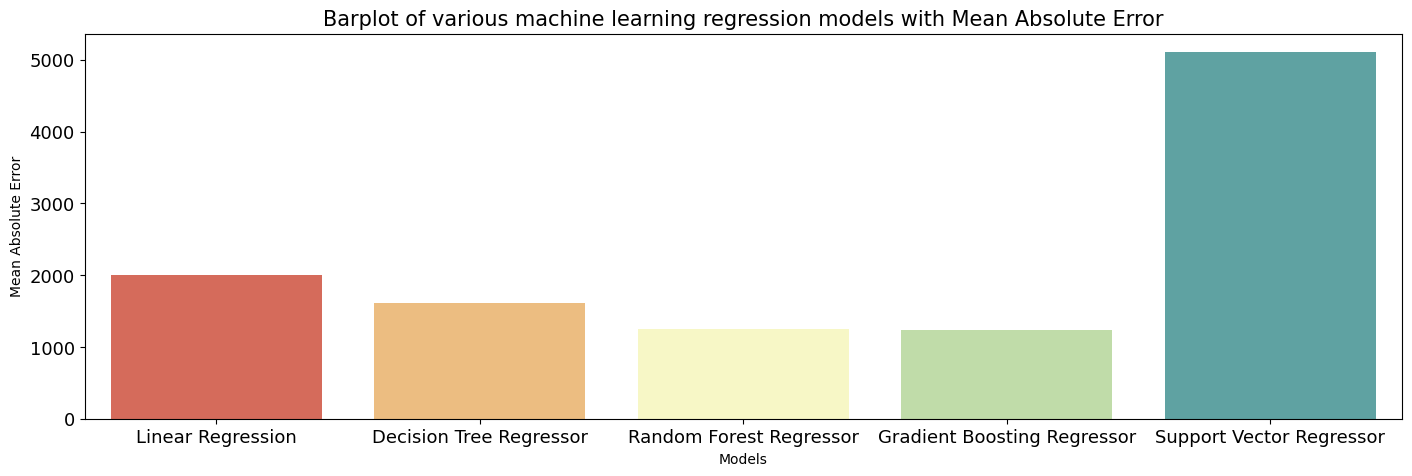

In [123]:
#barplot for different error_mean_absolute value
plt.figure(figsize = (17, 5))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Absolute Error', palette = 'Spectral')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with Mean Absolute Error", fontsize = 15)
plt.show()

from the above graph, it is clear that Random Forest Regressor and Decision Tree Regressor have the low mean absolute error. So, according to the data and its properties like collinearity, outliers are will affect the model. According to this dataset, we should say *Gradient Booting Regressor* is the best model with accuracy of 98% and mean absolute error of 1242.